Образовательный центр МГТУ им. Н.Э. Баумана

# Выпускная квалификационная работа по курсу "Data Science"

## Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).

Выполнил: Четвериков А.В.

## 4. Разработка и обучение моделей прогнозирующих модуль упругости при растяжении и прочность при растяжении

In [71]:
# Загрузим необходимые библиотеки и модули 

import pathlib               #для задания относительного пути к файлам
from pathlib import Path

import joblib     # для сохранения/загрузки моделей машинного обучения

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model



In [72]:
%matplotlib inline

In [73]:
# Определим путь к предварительно подготовленному датасету

dir_path = pathlib.Path.cwd()

paht_out = Path(dir_path.parents[0], 'datasets', 'out_no_blowout.xlsx')

# так же можно задать путь явно:   
# paht_bp = r"C:\ ... \vkr\datasets\out_no_blowout.xlsx"

In [74]:
#Загрузим  датасет
df = pd.read_excel(paht_out)
df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [75]:
#Удалим первый столбец, так как он не несет никакой информации
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [76]:
# разделим датасет на целевую переменную и признаки

In [77]:
target_val = 'Прочность при растяжении, МПа'

In [78]:
df_target_val = df.loc[:, df.columns == target_val]
df_target_val.describe()

,"Прочность при растяжении, МПа"
count,996.000000
mean,2465.208339
std,484.183286
min,1036.856605
25%,2134.535871
50%,2456.394188
75%,2760.163022
max,3848.436732


In [79]:
df_signs = df.loc[:, df.columns != target_val]
df_signs.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,2.935559,1975.560961,739.322328,110.913646,22.231151,285.939388,479.197374,73.303787,218.351938,44.819277,6.899334,57.297080
std,0.908608,73.041367,327.708109,27.857831,2.387763,40.298154,277.918586,3.102701,58.719705,45.022244,2.553903,11.749357
min,0.389403,1784.482245,2.436909,29.956150,15.695894,173.484920,0.603740,64.054061,53.548916,0.000000,0.037639,23.143401
25%,2.319283,1923.713503,501.502849,92.597812,20.581352,258.951066,266.205564,71.233343,179.908444,0.000000,5.082481,50.022145
50%,2.908811,1977.574305,741.367350,110.858657,22.207416,285.853960,450.345833,73.207875,218.697660,0.000000,6.913444,57.516472
75%,3.552539,2021.238927,961.650808,130.001450,23.980937,313.053889,690.593845,75.314494,257.262334,90.000000,8.586121,64.930896
max,5.591742,2192.738783,1649.415706,192.851702,28.955094,403.652861,1291.340115,82.525773,386.903431,90.000000,14.440522,92.042139


In [80]:
# нормализуем наши датасеты

In [81]:
# отдельно целевая, отдельно признаки

In [82]:
# 1 - Normalizer()
# 2 - MinMaxScaler()
# 3 - StandardScaler()
# 4 - normalize()


preobraz = (3,)

df_target_val_norm = df_target_val
df_signs_norm = df_signs

for n in preobraz:
    if n == 1:
        norm_1 = Normalizer(norm = 'l2', copy = True)
        col = df_target_val.columns
        result = norm_1.fit_transform(df_target_val_norm.T)
        df_target_val_norm = pd.DataFrame(result.T, columns = col)
        
        norm_2 = Normalizer(norm = 'l2', copy = True)
        col = df_signs.columns
        result = norm_2.fit_transform(df_signs_norm.T)
        df_signs_norm = pd.DataFrame(result.T, columns = col)
        
        # сохраним нормализаторы
        joblib_file = "norm_y.joblib" 
        joblib.dump(norm_1, joblib_file)
        
        joblib_file = "norm_x.joblib" 
        joblib.dump(norm_2, joblib_file)        
        
    if n == 2:
        scaler_1 = MinMaxScaler((0.1, 0.9))
        col = df_target_val.columns
        result = scaler_1.fit_transform(df_target_val_norm)
        df_target_val_norm = pd.DataFrame(result, columns = col)
        
        scaler_2 = MinMaxScaler((0.1, 0.9))
        col = df_signs.columns
        result = scaler_2.fit_transform(df_signs_norm)
        df_signs_norm = pd.DataFrame(result, columns = col)
        
        # сохраним нормализаторы
        joblib_file = "norm_minmax_y.joblib" 
        joblib.dump(scaler_1, joblib_file)
        
        joblib_file = "norm_minmax_x.joblib" 
        joblib.dump(scaler_2, joblib_file)        
        
        
        
    if n == 3:
        scaler_1 = StandardScaler(copy = True, 
                           with_mean = True, 
                           with_std = True).fit(df_target_val_norm)
        df_standart_X1 = scaler_1.transform(df_target_val_norm)
        df_target_val_std = pd.DataFrame(df_standart_X1)
        df_target_val_std.columns = df_target_val.columns
        df_target_val_norm = df_target_val_std
        
        scaler_2 = StandardScaler(copy = True, 
                           with_mean = True, 
                           with_std = True).fit(df_signs_norm)
        df_standart_X2 = scaler_2.transform(df_signs_norm)
        df_signs_std = pd.DataFrame(df_standart_X2)
        df_signs_std.columns = df_signs.columns
        df_signs_norm = df_signs_std
        
        # сохраним стандартизаторы
        joblib_file = "stand_y.joblib" 
        joblib.dump(scaler_1, joblib_file)
        
        joblib_file = "stand_x.joblib" 
        joblib.dump(scaler_2, joblib_file) 
        
        
    if n == 4:
        res_1, k_norm_1 = preprocessing.normalize(df_target_val_norm, norm='l2', return_norm = True, axis=0)
        df_target_val_norm = pd.DataFrame(res_1, columns = df_target_val.columns)
        
        res_2, k_norm_2 = preprocessing.normalize(df_signs_norm, norm='l2', return_norm = True, axis=0)
        df_signs_norm = pd.DataFrame(res_2, columns = df_signs.columns)
        


Text(0.5, 1, '4')

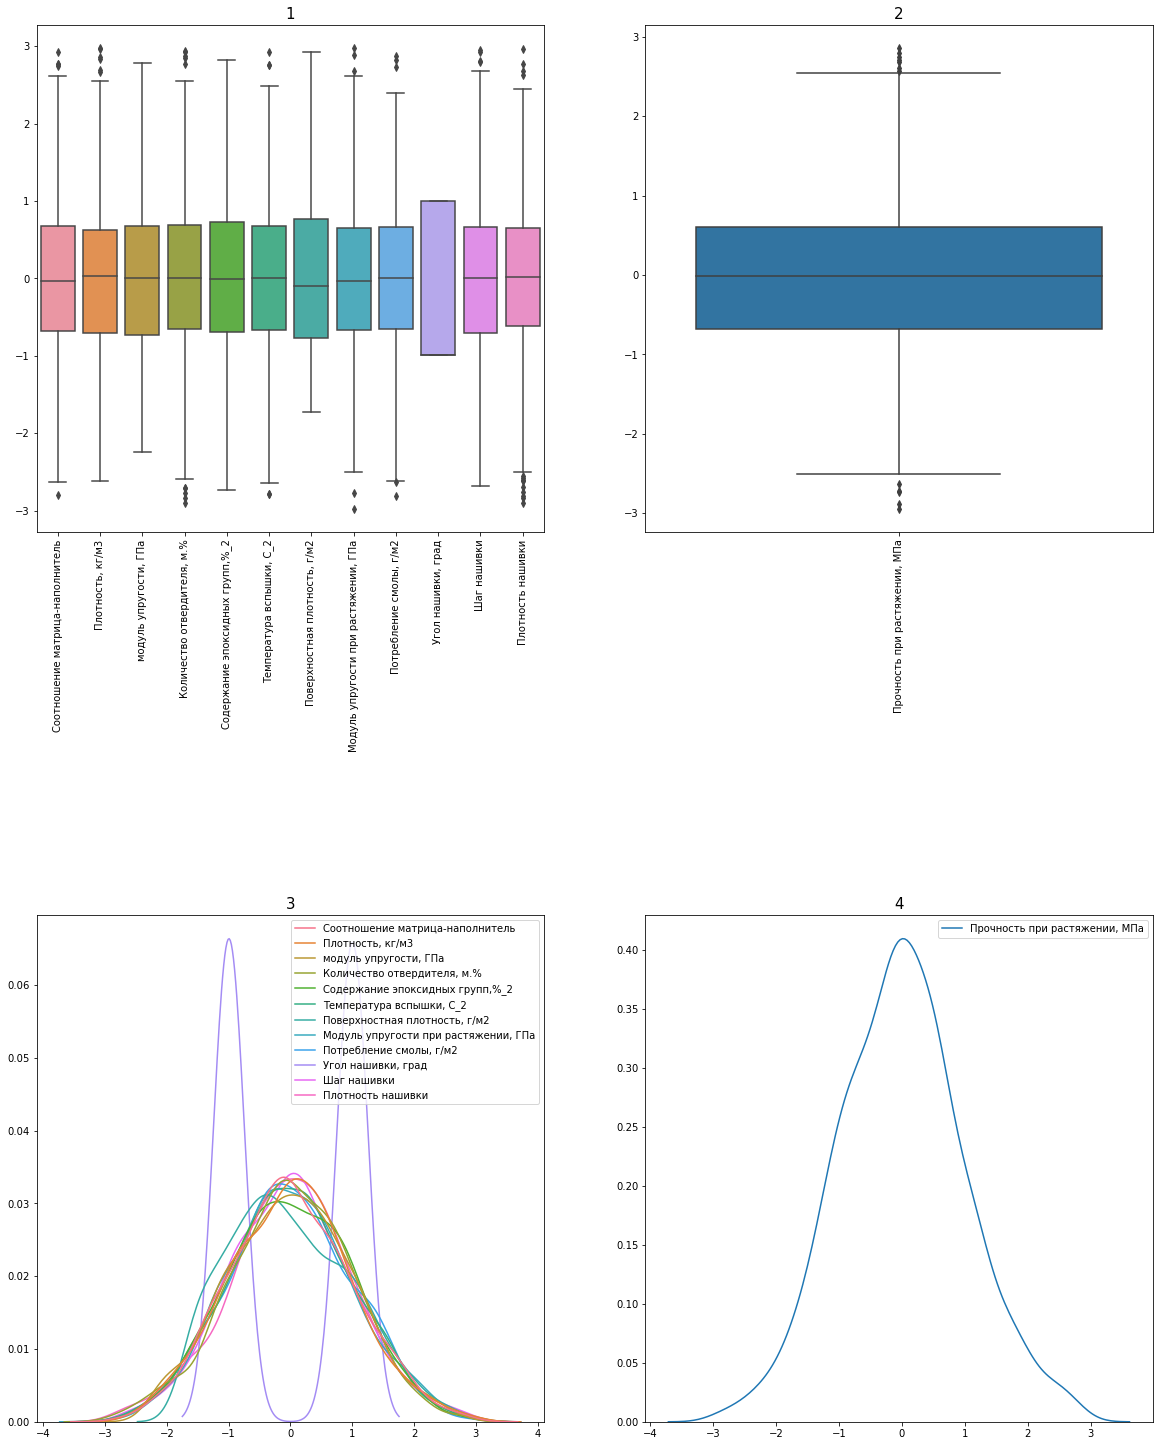

In [83]:


plt.figure(figsize = (20,30))


plt.subplot(2, 2, 1, box_aspect= 1)
ax = sns.boxplot(data = df_signs_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('1', y = 1, size = 15)

plt.subplot(2, 2, 2, box_aspect= 1)
ax = sns.boxplot(data = df_target_val_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('2', y = 1, size = 15) 

plt.subplot(2, 2, 3, box_aspect= 1)
sns.kdeplot(data=df_signs_norm)
plt.ylabel(None)
plt.xlabel(None)
plt.title('3', y = 1, size = 15)

plt.subplot(2, 2, 4, box_aspect= 1)
sns.kdeplot(data=df_target_val_norm)
plt.ylabel(None)
plt.xlabel(None)
plt.title('4', y = 1, size = 15)
    

In [84]:
df_target_val_norm.describe()

,"Прочность при растяжении, МПа"
count,9.960000e+02
mean,8.159470e-17
std,1.000502e+00
min,-2.951505e+00
25%,-6.832921e-01
50%,-1.821331e-02
75%,6.094859e-01
max,2.858263e+00


In [85]:
df_signs_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02
mean,-7.735891e-17,4.345029e-16,1.276311e-16,-1.245100e-16,-1.702342e-15,1.447972e-16,7.446074e-17,-2.309676e-15,-3.518493e-16,7.989593e-15,-9.809199e-18,-5.996988e-17
std,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00
min,-2.803667e+00,-2.617348e+00,-2.249733e+00,-2.907555e+00,-2.738354e+00,-2.791963e+00,-1.722929e+00,-2.982683e+00,-2.808015e+00,-9.959920e-01,-2.688098e+00,-2.908316e+00
25%,-6.786042e-01,-7.101935e-01,-7.260698e-01,-6.578055e-01,-6.912862e-01,-6.700526e-01,-7.667670e-01,-6.676390e-01,-6.550238e-01,-9.959920e-01,-7.117598e-01,-6.194884e-01
50%,-2.945314e-02,2.757828e-02,6.243513e-03,-1.974915e-03,-9.945263e-03,-2.120955e-03,-1.038651e-01,-3.092813e-02,5.890617e-03,-9.959920e-01,5.527805e-03,1.868205e-02
75%,6.793798e-01,6.256854e-01,6.787753e-01,6.855305e-01,7.331823e-01,6.731853e-01,7.610239e-01,6.483759e-01,6.629792e-01,1.004024e+00,6.608060e-01,6.500484e-01
max,2.924821e+00,2.974847e+00,2.778542e+00,2.942771e+00,2.817417e+00,2.922531e+00,2.923701e+00,2.973738e+00,2.871884e+00,1.004024e+00,2.954293e+00,2.958674e+00


Выделим из датасета прогнозируемую (зависимую) переменную. И разделим выборку на обучающую и тестовую выборки, в соответствии с условием задачи 70% (на обучение) /30% (на тестирование)


In [86]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    df_signs_norm,
    df_target_val_norm,
       test_size = 0.3,
    random_state = 42)

In [87]:
# Проверка правильности разбивки
df.shape[0] - x_train_1.shape[0] - x_test_1.shape[0]

0

In [88]:
x_train_1.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
650,0.821589,2.536693,-0.795077,0.675949,-1.415590,0.085287,-0.054125,-0.313556,1.495509,1.004024,-1.016693,-0.849945
918,-0.685231,-1.642091,1.040682,-0.659982,1.118747,-0.610606,-0.129717,0.599269,0.161718,1.004024,-0.467387,-0.442587
926,0.258421,-0.770184,0.419638,-0.110009,0.805172,-0.814632,-1.138475,0.858583,1.770553,1.004024,0.918229,0.541034
377,-2.057166,-0.154411,-1.190668,-0.130200,-0.939680,-1.551479,-1.499258,-0.010914,0.144602,-0.995992,-1.140975,0.003818
939,0.620763,-0.902846,0.023453,1.904102,-0.423235,0.895295,2.293076,-1.002572,-0.026699,1.004024,-0.062786,-0.730506


In [89]:
y_train_1.head()

,"Прочность при растяжении, МПа"
650,-0.049280
918,0.999628
926,1.300237
377,-0.405294
939,1.371772


In [90]:
x_test_1.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
832,0.466753,0.952523,-1.291805,0.420100,0.733044,0.511978,-0.384639,-0.444769,0.267135,1.004024,1.046568,0.623745
970,-0.277238,-0.596996,0.207619,-0.365767,0.138496,-0.262280,1.030541,1.206043,-1.385176,1.004024,-0.488443,-0.312884
96,0.189755,0.174523,-1.716681,-2.113188,-2.201520,0.152281,1.132687,0.580096,-0.772807,-0.995992,0.120379,-1.354681
587,1.504519,1.019739,1.216846,0.902338,0.112814,-0.266709,2.704552,1.053496,-0.519228,1.004024,1.275261,0.502244
450,-0.935386,0.107686,-0.077066,-0.503806,-0.729438,-0.289794,1.044666,0.040271,-0.482355,-0.995992,0.660807,1.910866


In [91]:
y_test_1.head()

,"Прочность при растяжении, МПа"
832,-0.427178
970,2.181124
96,-0.193898
587,0.246211
450,0.177828


In [92]:
y_test_1 = np.ravel(y_test_1)
y_train_1 = np.ravel(y_train_1)

In [93]:
y_test_1.shape

(299,)

## Линейная регрессия

In [94]:
#*(LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive =False)

lr = LinearRegression()

In [95]:
# определим гиперпараметры для подбора
param_grid_lr = {'fit_intercept': [True, False],
               'positive': [True, False]}

In [96]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_lr = GridSearchCV(lr, param_grid_lr, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_lr.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_lr.best_params_)
lr = gs_lr.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {lr.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 4 candidates, totalling 40 fits

_______Оптимальные параметры:
{'fit_intercept': False, 'positive': False}

R2-score DTR для модуля упругости при растяжении: -0.033


In [97]:
# оценка модели
best_model = lr
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 0.03

***Результат на тестовой выборке***
lr_MAE: 0.78
lr_MAPE: 1.97
lr_MSE: 0.97
lr_RMSE: 0.98
Test score: -0.03


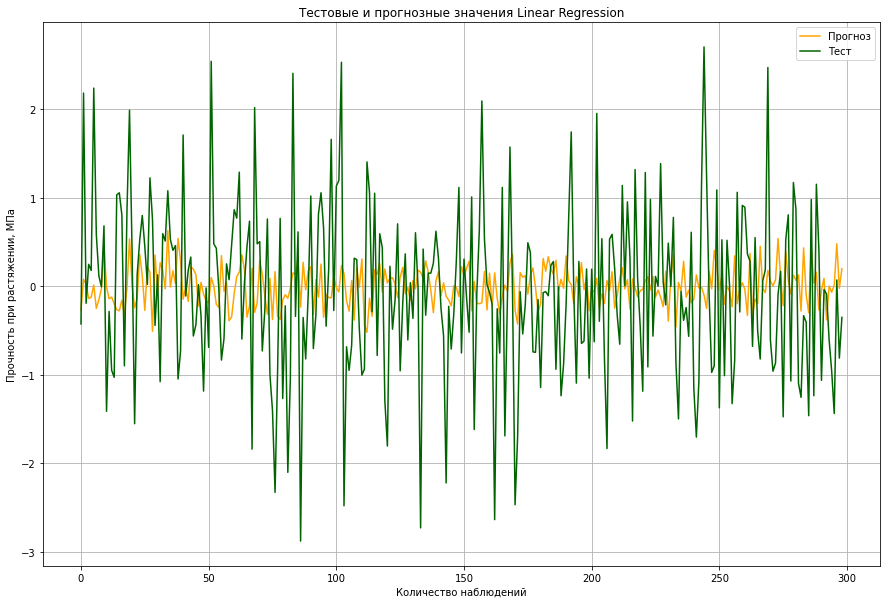

In [98]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

In [99]:
#  сохраним модель для дальнейшего использования в приложении

In [100]:
joblib_file = "lr_joblib_model.joblib" 
joblib.dump(lr, joblib_file)

['lr_joblib_model.joblib']

## Метод опорных векторов

In [101]:
#class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, 
#                     shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr = SVR()

In [102]:
# определим гиперпараметры для подбора
param_grid_svr = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                 'degree': [1,2,3,4,5,6,10],
                 'gamma': ['scale', 'auto'],
#                 'coef0': [0.0,0.1,0.5,10.0],
#                 'tol': [0.0005,0.001,0.005,1.0],
#                 'C': [0.5,1.0,1.5,5.0],
#                 'epsilon': [0.05,0.1,0.2,1.0],
                 'shrinking': [True, False],
#                 'cache_size': [100,200,500]
                }

In [103]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_svr = GridSearchCV(svr, param_grid_svr, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_svr.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_svr.best_params_)
svr = gs_svr.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {svr.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 16 candidates, totalling 160 fits

_______Оптимальные параметры:
{'gamma': 'scale', 'kernel': 'linear', 'shrinking': False}

R2-score DTR для модуля упругости при растяжении: -0.024


In [104]:
# оценка модели
best_model = svr
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 0.02

***Результат на тестовой выборке***
lr_MAE: 0.78
lr_MAPE: 2.77
lr_MSE: 0.96
lr_RMSE: 0.98
Test score: -0.02


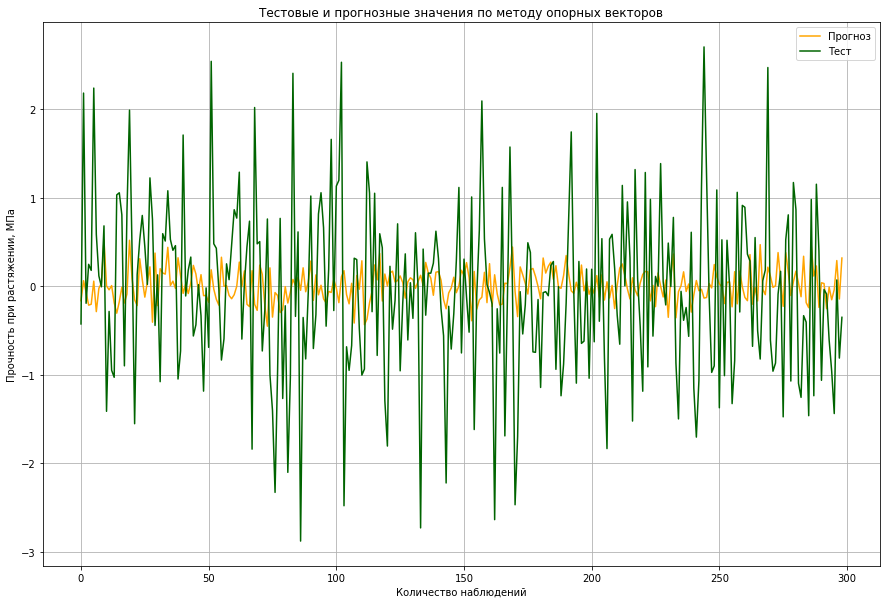

In [105]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения по методу опорных векторов")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Метод случайного леса - Random Forest Regressor

In [106]:
#построение модели и вузуализация метода случайный лес
# class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, 
#      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
#      min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#      warm_start=False, ccp_alpha=0.0, max_samples=None)

rfr = RandomForestRegressor()

In [107]:
# определим гиперпараметры для подбора
param_grid_rfr = {'n_estimators': [10,50,#100,200,500
                                  ],
                 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#                 'max_depth': [None, '100'],
#                 'min_samples_split': [1,2,3,5,10],
#                 'min_samples_leaf': [1,2,5,10],
#                 'min_weight_fraction_leaf': [0.0,0.1,0.5,1.0,1.5,5.0],
                 'max_features': [None, 'sqrt'#, 'log2', 1,2,5,10'
                                 ],
#                 'max_leaf_nodes': [None, 1,2,5,10],
#                 'min_impurity_decrease': [0.0,0.1,0.5,1.0,1.5,5.0],
                 'bootstrap': [True, False],
                 'oob_score': [True, False],
                 'random_state': [42,],
#                 'ccp_alpha': [0.0,0.1,0.5,1.0,1.5,5.0],
                 'max_samples': [None,1,5,10]
                }

In [108]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_rfr = GridSearchCV(rfr, param_grid_rfr, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_rfr.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_rfr.best_params_)
rfr = gs_rfr.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {rfr.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab


_______Оптимальные параметры:
{'bootstrap': True, 'criterion': 'absolute_error', 'max_features': 'sqrt', 'max_samples': None, 'n_estimators': 50, 'oob_score': True, 'random_state': 42}

R2-score DTR для модуля упругости при растяжении: -0.024


In [109]:
# оценка модели
best_model = rfr
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 0.86

***Результат на тестовой выборке***
lr_MAE: 0.78
lr_MAPE: 2.62
lr_MSE: 0.96
lr_RMSE: 0.98
Test score: -0.02


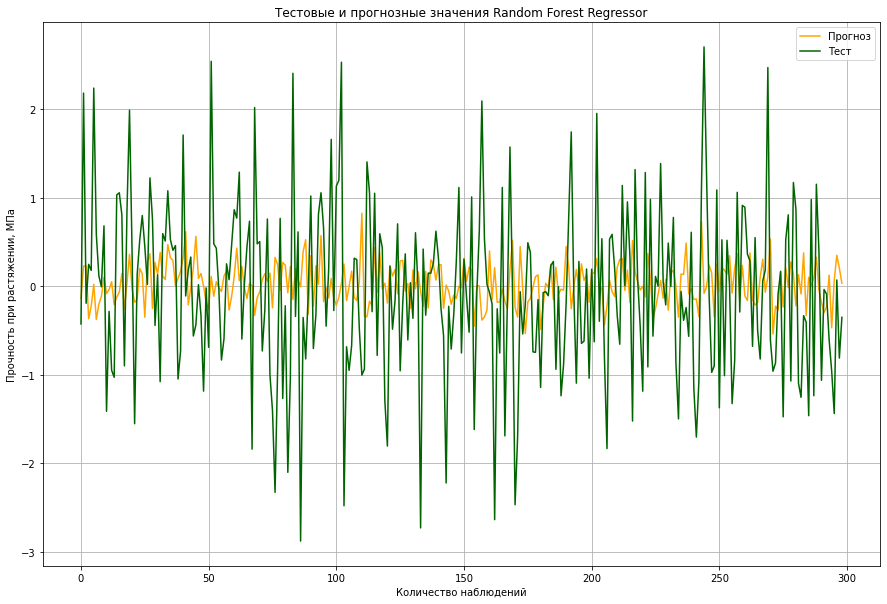

In [110]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Метода градиентного бустинга

In [111]:
#class sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, 
#       subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#       max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, 
#       max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

gbr = GradientBoostingRegressor()

In [112]:
# определим гиперпараметры для подбора
param_grid_gbr = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#                 'learning_rate': [0.0,0.1,0.5,1.0,1.5,5.0],
#                 'n_estimators': [1,20,50,100,500],
#                 'subsample': [0.0,0.1,0.5,1.0,1.5,5.0],
                 'criterion': ['friedman_mse', 'squared_error'],
#                 'min_samples_split': [1,2,5,10],
#                 'min_samples_leaf': [1,2,5,10],
#                 'min_weight_fraction_leaf': [0.0,0.1,0.5,1.0,1.5,5.0],
                 'max_depth': [1,3,5,10],
#                 'min_impurity_decrease': [0.0,0.1,0.5,1.0,1.5,5.0],
#                 'init': ['zero', None],
                 'random_state': [42,]
#                 'max_features': ['auto', 'sqrt', 'log2', None],
#                 'alpha': [0.0,0.2,0.9,1.0],
#                 'max_leaf_nodes': [None,1,3,5,10],
#                 'validation_fraction': [0.0,0.1,0.5,1.0],
#                 'tol': [None,0.0001,0.001],
#                 'ccp_alpha': [0.0,0.1,0.5,1.0,1.5,5.0],
                }

In [113]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_gbr = GridSearchCV(gbr, param_grid_gbr, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_gbr.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_gbr.best_params_)
gbr = gs_gbr.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {gbr.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 32 candidates, totalling 320 fits

_______Оптимальные параметры:
{'criterion': 'friedman_mse', 'loss': 'squared_error', 'max_depth': 1, 'random_state': 42}

R2-score DTR для модуля упругости при растяжении: -0.019


In [114]:
# оценка модели
best_model = gbr
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 0.13

***Результат на тестовой выборке***
lr_MAE: 0.77
lr_MAPE: 2.26
lr_MSE: 0.96
lr_RMSE: 0.98
Test score: -0.02


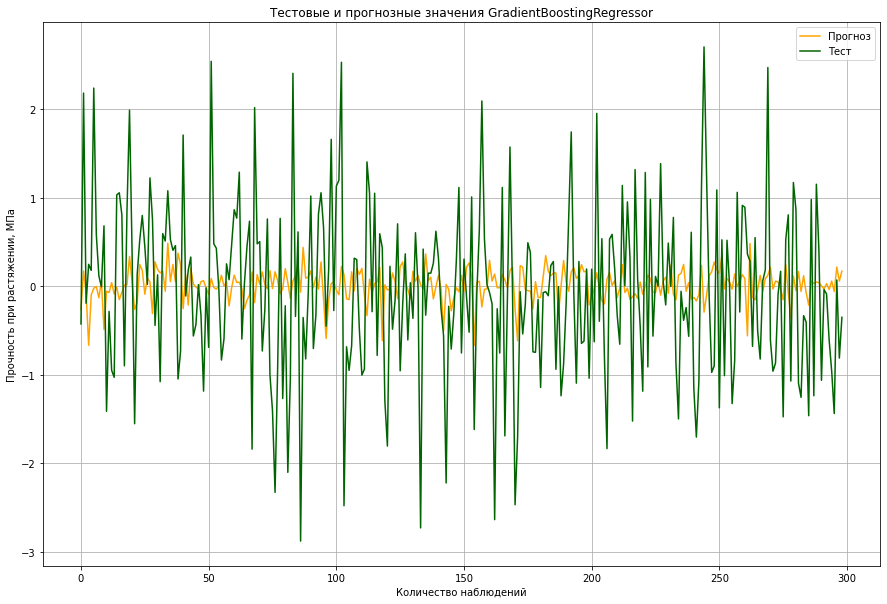

In [115]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения GradientBoostingRegressor")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Метод К ближайших соседей

In [116]:
#class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, 
#     p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn = KNeighborsRegressor()

In [117]:
# определим гиперпараметры для подбора
param_grid_knn = {'n_neighbors': [1,2,3,5,7,10],
                 'weights': ['uniform', 'distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                }

In [118]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_knn = GridSearchCV(knn, param_grid_knn, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_knn.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_knn.best_params_)
knn = gs_knn.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {knn.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 48 candidates, totalling 480 fits

_______Оптимальные параметры:
{'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'}

R2-score DTR для модуля упругости при растяжении: -0.136


In [119]:
# оценка модели
best_model = knn
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 1.00

***Результат на тестовой выборке***
lr_MAE: 0.81
lr_MAPE: 6.23
lr_MSE: 1.07
lr_RMSE: 1.03
Test score: -0.14


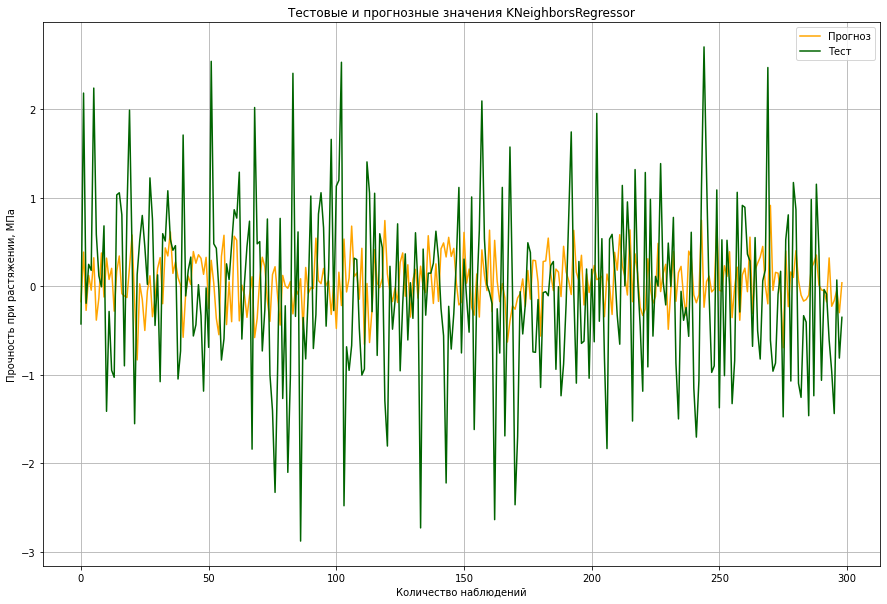

In [120]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения KNeighborsRegressor")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Деревья решений

In [121]:
#class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, 
#       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
#       max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
dtr = DecisionTreeRegressor()

In [122]:
# определим гиперпараметры для подбора
param_grid_dtr = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 'splitter': ['best', 'random'],
                 'random_state': [42,]
                }

In [123]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_dtr = GridSearchCV(dtr, param_grid_dtr, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_dtr.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_dtr.best_params_)
dtr = gs_dtr.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {dtr.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 8 candidates, totalling 80 fits

_______Оптимальные параметры:
{'criterion': 'friedman_mse', 'random_state': 42, 'splitter': 'random'}

R2-score DTR для модуля упругости при растяжении: -1.044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 178, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson reg

In [124]:
# оценка модели
best_model = dtr
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 1.00

***Результат на тестовой выборке***
lr_MAE: 1.11
lr_MAPE: 7.13
lr_MSE: 1.92
lr_RMSE: 1.39
Test score: -1.04


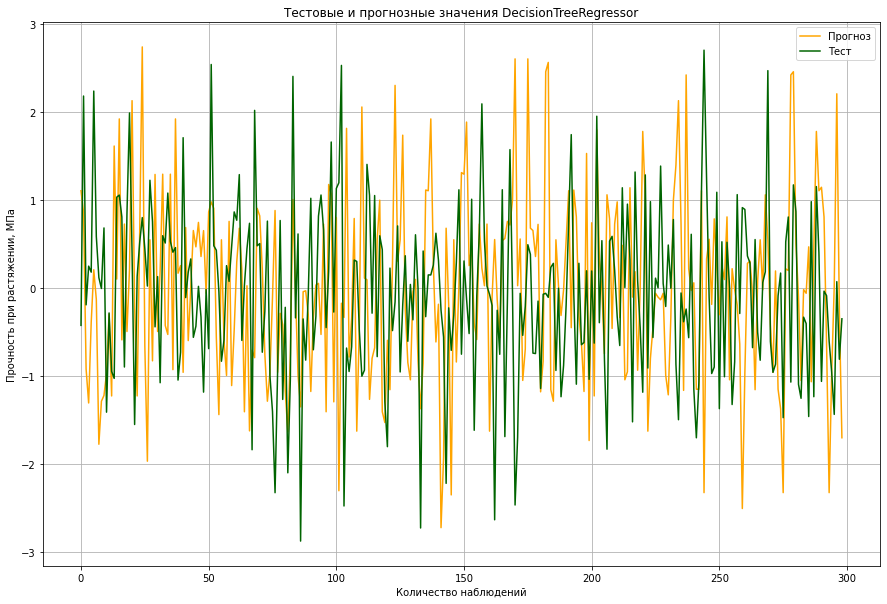

In [125]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Стохастический градиентный спуск

In [126]:
#class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, 
#      fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, 
#      learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, 
#       n_iter_no_change=5, warm_start=False, average=False)
sdg = SGDRegressor()

In [127]:
# определим гиперпараметры для подбора
param_grid_sdg = {'loss': ['squared_error',  'huber', 'epsilon_insensitive', 'quared_epsilon_insensitive'],
                 'penalty': ['l2', 'l1', 'elasticnet', None],
                 'fit_intercept': [True,False],
                 'shuffle': [True,False],
                 'learning_rate': ['constant','optimal','invscaling','adaptive'],
                 'random_state': [42,]
                }

In [128]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_sdg = GridSearchCV(sdg, param_grid_sdg, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_sdg.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_sdg.best_params_)
sdg = gs_sdg.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {sdg.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 256 candidates, totalling 2560 fits

_______Оптимальные параметры:
{'fit_intercept': False, 'learning_rate': 'invscaling', 'loss': 'huber', 'penalty': None, 'random_state': 42, 'shuffle': True}

R2-score DTR для модуля упругости при растяжении: -0.002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
640 fits failed out of a total of 2560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 1537, in fit
    return self._fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 1472, in _fit
    self._validate_params()
  File "C:\ProgramData\

In [129]:
# оценка модели
best_model = sdg
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 0.02

***Результат на тестовой выборке***
lr_MAE: 0.76
lr_MAPE: 1.42
lr_MSE: 0.94
lr_RMSE: 0.97
Test score: -0.00


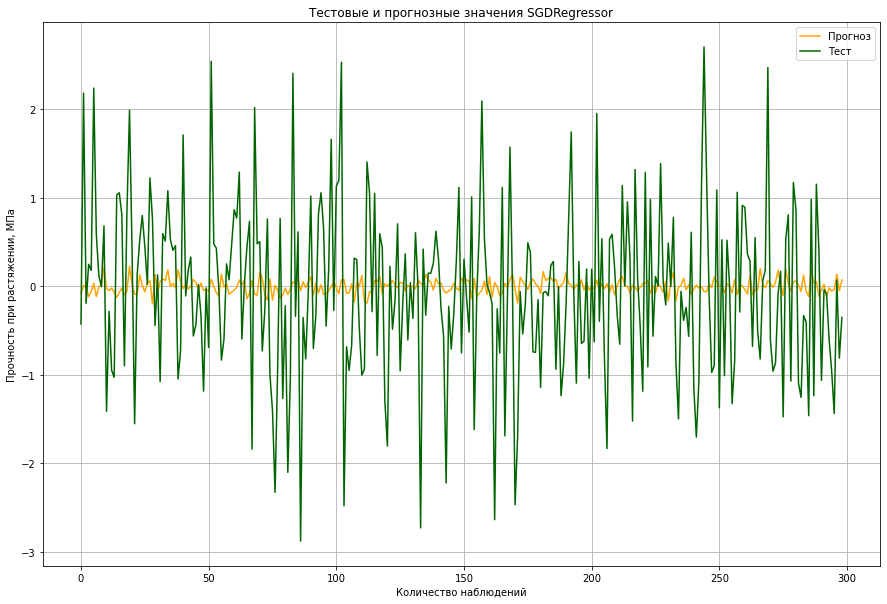

In [130]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения SGDRegressor")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Многослойный перцептрон

In [131]:
# class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', 
#       alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
#       max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
#       momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
#       beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

mlp = MLPRegressor()

In [132]:
# определим гиперпараметры для подбора
param_grid_mlp = {'hidden_layer_sizes': [(100,),  (64,64,64), (128,2,64)],
                 'activation': ['identity', 'logistic', 'tanh', 'relu'],
                 'solver': ['lbfgs', 'sgd', 'adam'],
                 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'nesterovs_momentum': [True, False],
                  'shuffle': [True, False],
                 'random_state': [42,]
                }

In [133]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_mlp = GridSearchCV(mlp, param_grid_mlp, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_mlp.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_mlp.best_params_)
mlp = gs_mlp.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {mlp.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



_______Оптимальные параметры:
{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'nesterovs_momentum': True, 'random_state': 42, 'shuffle': True, 'solver': 'sgd'}

R2-score DTR для модуля упругости при растяжении: -0.015


In [134]:
# оценка модели
best_model = mlp
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: 0.02

***Результат на тестовой выборке***
lr_MAE: 0.77
lr_MAPE: 1.54
lr_MSE: 0.95
lr_RMSE: 0.98
Test score: -0.01


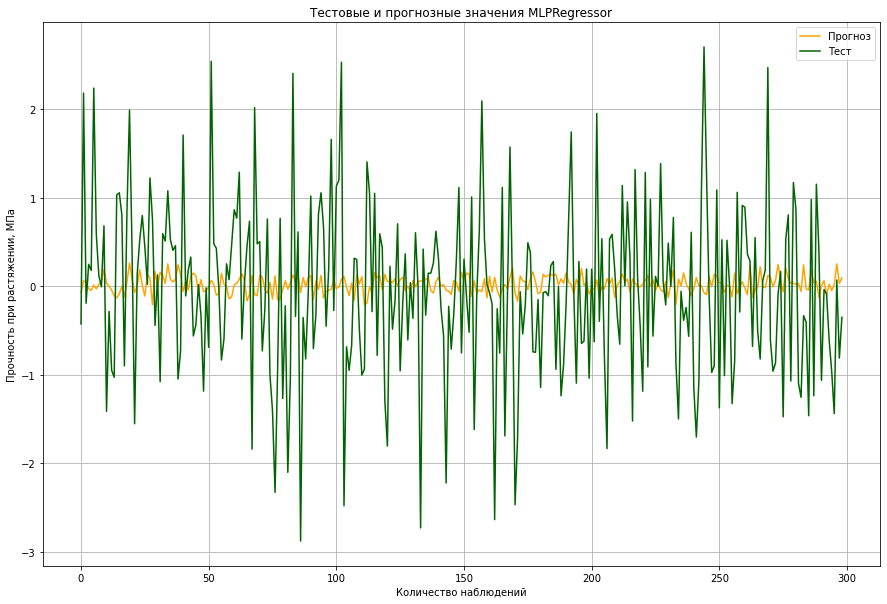

In [135]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения MLPRegressor")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

## Лассо регрессия

In [136]:
# class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, 
#    copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso = Lasso()

In [137]:
# определим гиперпараметры для подбора
param_grid_lasso = {'fit_intercept': [True, False],
                 'precompute': [True, False],
                 'positive': [True, False],
                 'selection': ['cyclic', 'random'],
                 'random_state': [42,]
                }

In [138]:
# запускаем GridSearch для поиска оптимальных гиперпараметров
gs_lasso = GridSearchCV(lasso, param_grid_lasso, cv = 10, verbose = 1, scoring = 'r2', error_score=np.nan)
gs_lasso.fit(x_train_1, y_train_1)

# отобразим лучший результат
print()
print("_______Оптимальные параметры:")
print(gs_lasso.best_params_)
lasso = gs_lasso.best_estimator_
print()
print(f'R2-score DTR для модуля упругости при растяжении: {lasso.score(x_test_1, y_test_1).round(3)}')

Fitting 10 folds for each of 16 candidates, totalling 160 fits

_______Оптимальные параметры:
{'fit_intercept': False, 'positive': True, 'precompute': True, 'random_state': 42, 'selection': 'cyclic'}

R2-score DTR для модуля упругости при растяжении: -0.004


In [139]:
# оценка модели
best_model = lasso
y_pred = best_model.predict(x_test_1)
print('***Результат на тренировочной выборке***')
print("Test score: {:.2f}".format(best_model.score(x_train_1, y_train_1)))
print()
print('***Результат на тестовой выборке***')    
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred)))
print('lr_MSE: {:.2f}'.format(mean_squared_error(y_test_1, y_pred)))
print("lr_RMSE: {:.2f}".format (np.sqrt(mean_squared_error(y_test_1, y_pred))))
print("Test score: {:.2f}".format(best_model.score(x_test_1, y_test_1)))

***Результат на тренировочной выборке***
Test score: -0.00

***Результат на тестовой выборке***
lr_MAE: 0.76
lr_MAPE: 1.00
lr_MSE: 0.94
lr_RMSE: 0.97
Test score: -0.00


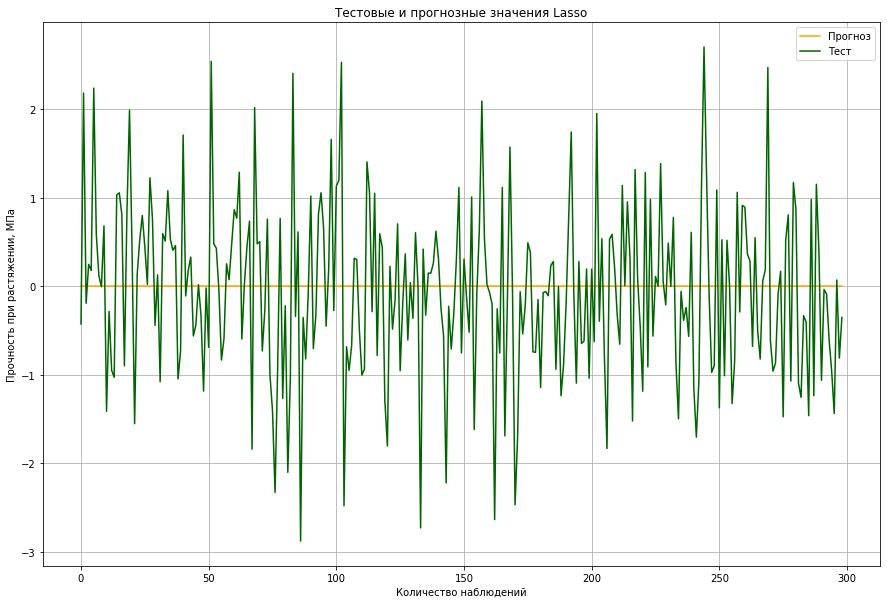

In [140]:
# нарисуем график предсказанных и фактических значений по тестовой выборке
plt.figure(figsize = (15, 10))
plt.title("Тестовые и прогнозные значения Lasso")
plt.plot(y_pred, label="Прогноз", color = 'orange')
plt.plot(y_test_1, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel(target_val)
plt.legend()
plt.grid(True);

# 5. Оценка точности моделей для прогнозирования свойств